# O Básico sobre Matplotlib

#### 1 - Inline vs. notebook

In [1]:
#matplotlib inline

%matplotlib notebook

#### 2 - Acessando a camada backend

In [2]:
import matplotlib as mpl
print(mpl.get_backend())

nbAgg


#### 3 - Importar Pyplot (camada de script)

In [3]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


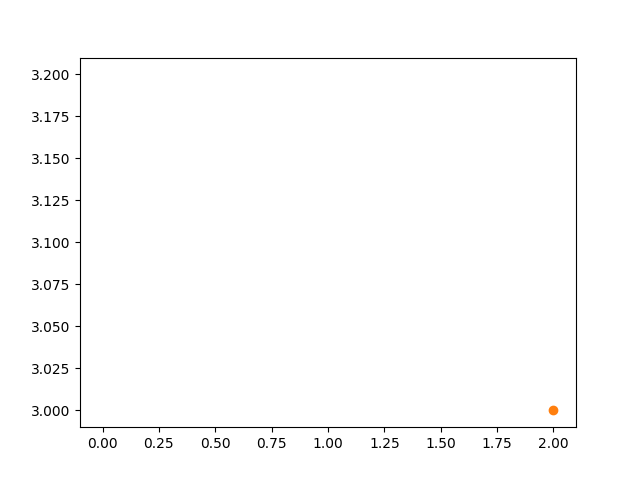

In [4]:
plt.plot(3.2)

In [5]:
plt.plot(2,3,'o')

#### 4 - Trabalhando direto na camada do artista

In [6]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# Cria nova figura
fig = Figure()

# associa a figura ao backend
canvas = FigureCanvasAgg(fig)

# adiciona um subplot à figura
ax = fig.add_subplot(111)

# plota o ponto
ax.plot(3, 2, '.')

#Salva a figura
canvas.print_png('test.png')

In [7]:
%%html
<img src='test.png' />

#### 5 - Voltando à camada de scripting

<IPython.core.display.Javascript object>


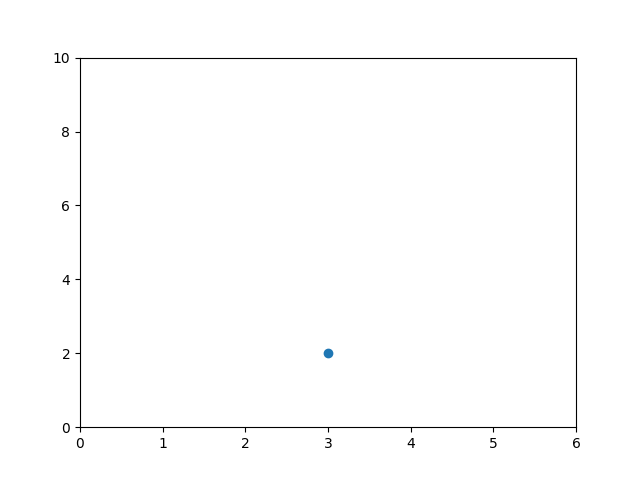

(0.0, 6.0, 0.0, 10.0)

In [8]:
# cria uma nova figura
plt.figure()
# plota o ponto 3,2 usando o marcador 'o'
plt.plot(3,2,'o')
# pega ambos os eixos (get the current axes) e atribui à variável ax
ax = plt.gca()
# configura limites nos eixos [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

#### 6 - Adicionando mais dados à figura

<IPython.core.display.Javascript object>


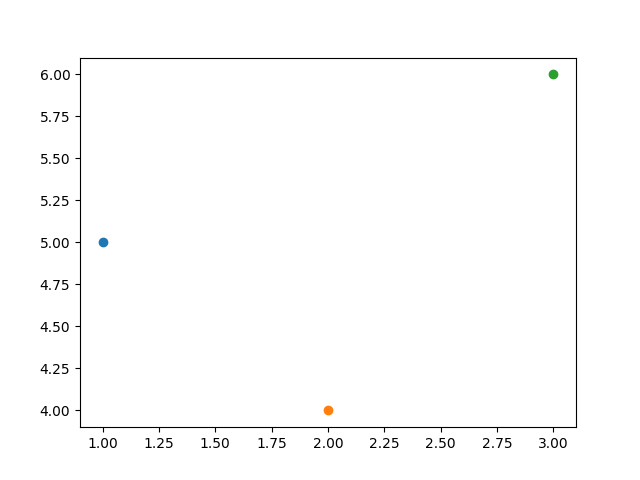

In [9]:
# cria nova figura
plt.figure()
plt.plot(1,5,'o')
plt.plot(2,4,'o')
plt.plot(3,6,'o')



#### 7 - Levantamento dos objetos de uma figura

In [10]:
ax = plt.gca()

ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

# Plots de dispersão - Scatter plots

#### 8 - Se os dois argumentos têm mesmo valor, temos uma diagonal.

<IPython.core.display.Javascript object>


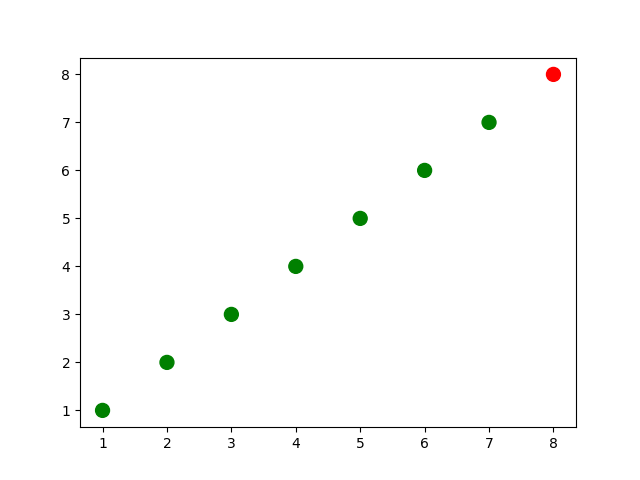

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [11]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x,y)

plt.gca().get_children()
# similar ao plt.plot(x, y, '.'), porém os objetos filhos não são Line2D
# e sim PathCollection

#### 9 - Atribuição de cores dentro da mesma coleção

In [12]:
# criar uma lista de cores verdes...
colors = ['green']*(len(x)-1)
# com o último elemento vermelho
colors.append('red')


plt.scatter(x,y, s=100, c=colors)


# plotar os pontos com tamanho 100 e as cores selecionadas


#### 10 - Plotando coleções com cores diferentes

<IPython.core.display.Javascript object>


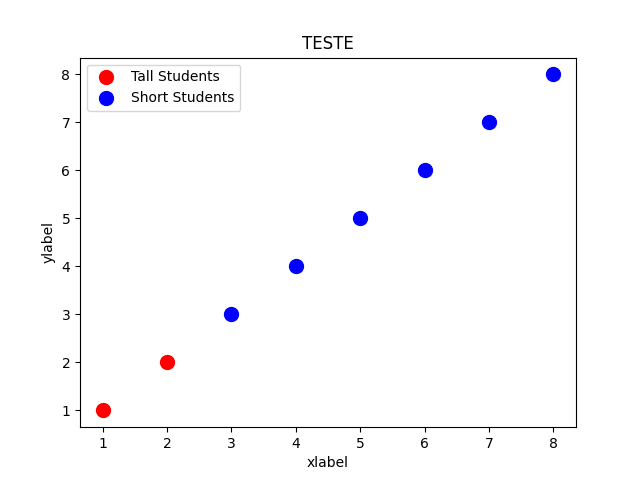

In [13]:
plt.figure()

# plotar 'Tall students' em vermelho usando os dois primeiros elementos
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall Students')
# plotar 'Short students' em azul usando o restante dos elementos
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short Students')




#plt.gcf().get_children()
#plt.gca().get_children()


#### 11 - Adicionar labels no eixos e o título do plot.

In [14]:
# adicionar label no eixo x
plt.xlabel('xlabel')
# adicionar label no eixo y
plt.ylabel('ylabel')
# adicionar título
plt.title('TESTE')



Text(0.5, 1.0, 'TESTE')

#### 12 - Adicionar legendas

In [15]:
# adicionar legenda
plt.legend()

#### 13 - Configurar legendas

In [16]:
# reposicionar legenda e tirar quadro
plt.legend(loc=4, frameon=False, title='Legend')

#### 14 - Verificar objeto legenda

In [17]:
# imprimir os objetos filhos dos eixos correntes
plt.gca().get_children()

 Text(0.5, 1.0, 'TESTE'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

#### 15 - Navegando pelos objetos da Legenda (acessando a camada artist)

In [18]:
# pegar a legenda dos eixos correntes
legend = plt.gca().get_children()[-2]

In [19]:
# podemos usar get_children para navegar pelas classes artistas
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [20]:
# importa a classe artist do matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # aumentar a profundidade para impressão bonita
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Chame essa função no objeto legend para ver como ele é composta
rec_gc(plt.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall Students')
                        Text(0, 0, 'Short Students')
    FancyBboxPatch((0, 0), width=1, height=1)


# Plotagem linear

#### 16 - Exemplo de plot linear 

<IPython.core.display.Javascript object>


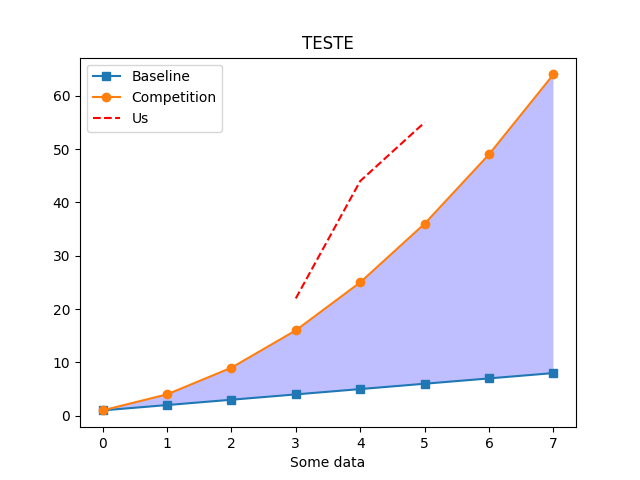

In [21]:
linear = np.array([1,2,3,4,5,6,7,8])
exponential = linear**2

plt.figure()

plt.plot(linear,'-s', exponential, '-o')


#### 17 - Outro exemplo

In [22]:
plt.plot([3,4,5],[22,44,55], '--r')

#### 18 - Adiciona labels, título e legenda

In [23]:
plt.xlabel('Some data')
plt.title('TESTE')
plt.legend(['Baseline', 'Competition', 'Us'])

#### 19 - Preenche a área entre os dados lineares e exponenciais

In [24]:
#fill_between
plt.gca().fill_between(range(len(linear)), 
                       linear, exponential, 
                       facecolor='blue', 
                       alpha=0.25)

#### 20 - Agora vamos colocar datas nos ticks do eixo x

<IPython.core.display.Javascript object>


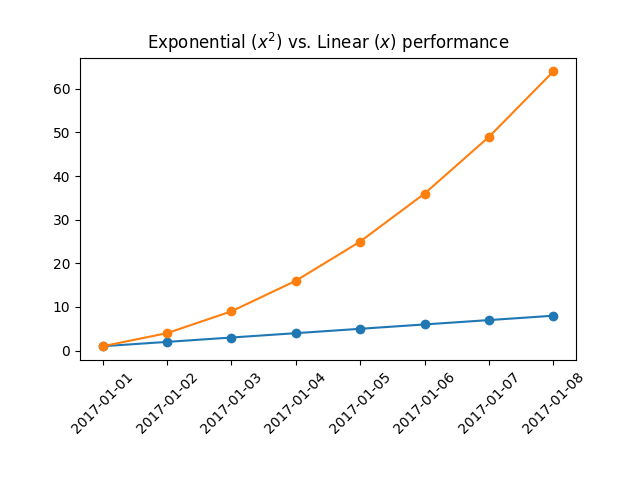

In [25]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear, '-o',  observation_dates, exponential, '-o')

#### 21 - Rodando os labels dos ticks do eixo x (acessando o modo artista)

In [26]:
x = plt.gca().xaxis

#rec_gc(x)

for item in x.get_ticklabels():
    item.set_rotation(45)

#### 22 - Ajustando subplots

In [27]:
plt.subplots_adjust(bottom=0.25)

#### 23 - Rótulos dos eixos x e y + título do plot

In [28]:
ax = plt.gca()

#### 24 - Compatibilidade com Latex

In [29]:
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

# Barras

#### 25 - Exemplo de um chart em barras

<IPython.core.display.Javascript object>


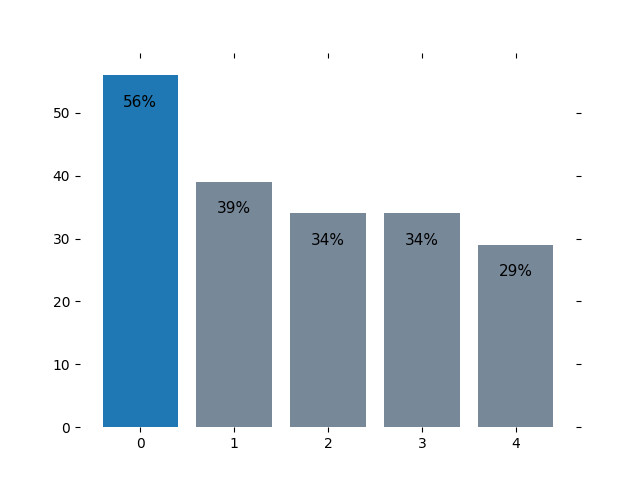

<BarContainer object of 5 artists>

In [30]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
popularity = [56, 39, 34, 34, 29]

xvals = range(len(languages))
plt.bar(xvals, popularity, width = 0.5)

#### 26 - Adicionando o valor na barra

In [31]:
pos = np.arange(len(languages))

bars = plt.bar(pos, popularity, align='center', linewidth=0, color="lightslategrey")
bars[0].set_color('#1F77B4')

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', fontsize=11)

#### 27 - Limpando parâmetros dos "ticks"

In [32]:
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

#### 28 - Tirando o quadro em volta do plot

In [33]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#### 29 - Empilhamento de barras

<IPython.core.display.Javascript object>


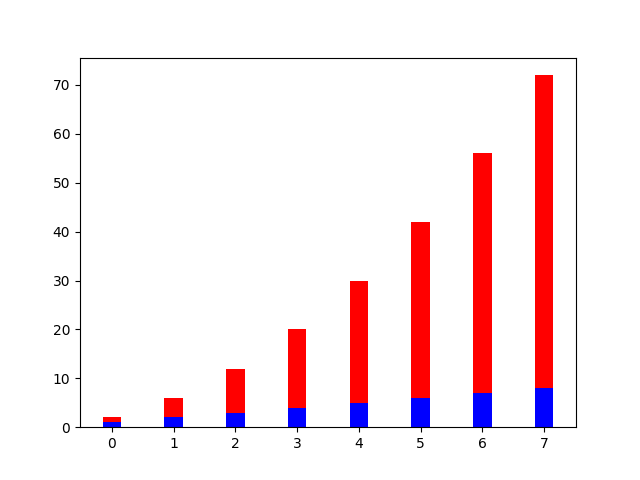

<BarContainer object of 8 artists>

In [34]:
plt.figure()
xvals = range(len(linear))
plt.bar(xvals, linear, width = 0.3, color='b')
plt.bar(xvals, exponential, width = 0.3, bottom=linear, color='r')

#### 30 - Barras horizontais

<IPython.core.display.Javascript object>


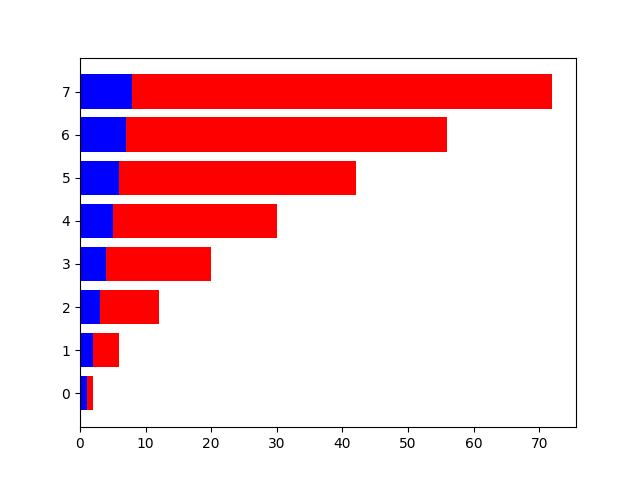

<BarContainer object of 8 artists>

In [35]:
plt.figure()
xvals = range(len(linear))
plt.barh(xvals, linear, color='b')
plt.barh(xvals, exponential, left=linear, color='r')